# HEART DISEASE
Only 14 attributes used:
1. age - integer - continuous
2. sex - (1/0)
3. cp - chest pain type - 4 values
4. trestbps - resting blood pressure - integer - continuous
5. chol - cholestrol - integer - continuous
6. fbs - fasting blood sugar - (1/0)
7. restecg - resting ECG results - (1/0)
8. thalach - maximum heart rate - Integer - Continuous
9. exang - exercise induced angina (1/0)
10. oldpeak - ST depression induced by exercise relative to rest - float
11. slope - Peak exercise ST segment - (0/1/2)
12. ca - number of major vessels colored by flourosopy - (0/1/2/3)
13. thal - displays the thalassemia - (3/6/7)
14. num - the predicted attribute (0 - absence /1/2/3/4 - Extent of presence)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/STUDIES/DATA TRAINED/DATASETS/heartdisease_data.csv",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [3]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.columns = cols
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
6,65,1,4,150,236,1,1,105,1,0,?,?,?,3
7,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
8,60,1,3,120,0,?,0,141,1,2,1,?,?,3
9,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  target    200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [5]:
df.describe()

,age,sex,cp,restecg,target
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


#### Replacing '?' with -1 for integers and np.nan for float

In [6]:
df['oldpeak'].replace('?',np.nan,inplace=True)

In [7]:
df['oldpeak'] = df['oldpeak'].astype("float")

In [8]:
df.replace('?',-1,inplace=True)

In [9]:
df['trestbps'] = df['trestbps'].astype("int64")
df['chol'] = df['chol'].astype("int64")
df['fbs'] = df['fbs'].astype("int64")
df['thalach'] = df['thalach'].astype("int64")
df['exang'] = df['exang'].astype("int64")
df['slope'] = df['slope'].astype("int64")
df['ca'] = df['ca'].astype("int64")
df['thal'] = df['thal'].astype("int64")

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.0000,144.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,96.030000,172.4550,0.305000,0.735000,89.990000,0.2100,1.320833,0.535000,-0.990000,0.240000,1.520000
std,7.811697,0.171015,0.795701,63.348673,116.8046,0.532346,0.683455,57.920582,0.8363,1.106236,1.637738,0.099748,2.796696,1.219441
min,35.000000,0.000000,1.000000,-1.000000,-1.0000,-1.000000,0.000000,-1.000000,-1.0000,-0.500000,-1.000000,-1.000000,-1.000000,0.000000
25%,55.000000,1.000000,3.000000,-1.000000,0.0000,0.000000,0.000000,-1.000000,-1.0000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.0000,0.000000,1.000000,111.500000,0.0000,1.500000,-1.000000,-1.000000,-1.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.5000,1.000000,1.000000,130.000000,1.0000,2.000000,2.000000,-1.000000,-1.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.0000,1.000000,2.000000,180.000000,1.0000,4.000000,3.000000,0.000000,7.000000,4.000000


### Checking Null Values

In [11]:
null = pd.DataFrame()
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',  'target', 'ca', 'thal']
null['cols'] = cols
null['value'] = 0

null['value'] = null.apply(lambda row : len( df[df[row['cols']]==-1] ),axis=1) 
null.loc[9,['value']] = df['oldpeak'].isnull().sum()
null['percentage missing'] = null['value']*100/200
# null.index
null

,cols,value,percentage missing
0,age,0,0.0
1,sex,0,0.0
2,cp,0,0.0
3,trestbps,56,28.0
4,chol,7,3.5
5,fbs,7,3.5
6,restecg,0,0.0
7,thalach,53,26.5
8,exang,53,26.5
9,oldpeak,56,28.0


* We can remove the 'ca' column since it has 99% missing data.
* We can group ages into bins and check whether it is possible to fill 'thal' based on it.
* Missing values in columns 'chol' and 'fbs' can be filed with their mean and mode respectively.
* Filling 'thalach', 'exang', 'oldpeak', 'slope', 'trestbps' based on age/sex/cp.


#### Grouping Age into bins

In [12]:
pd.qcut(df['age'], q=5).value_counts()

(58.0, 62.0]      47
(54.0, 58.0]      45
(34.999, 54.0]    42
(65.0, 77.0]      36
(62.0, 65.0]      30
Name: age, dtype: int64

In [13]:
bins = [34,54,58,62,65,77]
group_names = [0,1,2,3,4]
df['age-binned'] = pd.cut(df['age'],bins,labels=group_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age-binned
0,63,1,4,140,260,0,1,112,1,3.0,2,-1,-1,2,3
1,44,1,4,130,209,0,1,127,0,0.0,-1,-1,-1,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,-1,-1,2,2
3,55,1,4,142,228,0,1,149,1,2.5,1,-1,-1,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,-1,-1,0,4


#### Age vs Thal

<AxesSubplot:xlabel='age-binned', ylabel='count'>

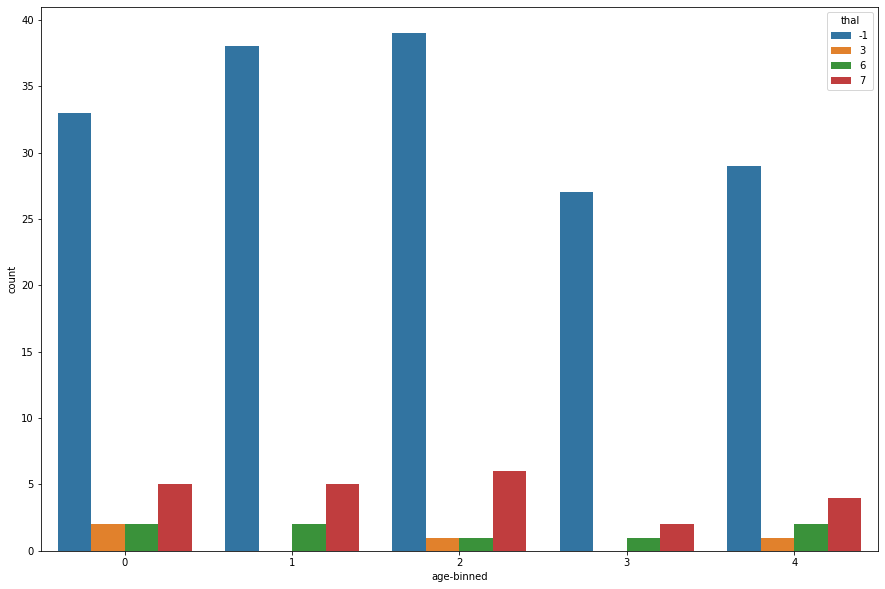

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['age-binned'],hue=df['thal'])

In [15]:
df_age_thal = df[['age-binned','thal']]

df_count_thal_age = pd.DataFrame()
# df_count_thal_age.cols = ['age',-1,7,3,6]
df_count_thal_age['age'] = [0,1,2,3,4]
df_count_thal_age[-1] = [0]*5
df_count_thal_age[7] = [0]*5
df_count_thal_age[3] = [0]*5
df_count_thal_age[6] = [0]*5

df_count_thal_age.set_index("age", inplace = True)

for i in range(5):
    t_df = df_age_thal[df_age_thal["age-binned"]==i]
    a = t_df['thal'].value_counts()
    for j in a.index:
        df_count_thal_age.loc[i,j] = a[j]
df_count_thal_age['total'] = df_count_thal_age[-1] + df_count_thal_age[3] + df_count_thal_age[7] + df_count_thal_age[6]

df_count_thal_age['-1%'] = df_count_thal_age[-1]*100/df_count_thal_age['total']
df_count_thal_age['7%'] = df_count_thal_age[7]*100/df_count_thal_age['total']
df_count_thal_age['3%'] = df_count_thal_age[3]*100/df_count_thal_age['total']
df_count_thal_age['6%'] = df_count_thal_age[6]*100/df_count_thal_age['total']

df_count_thal_age    

,-1,7,3,6,total,-1%,7%,3%,6%
age,,,,,,,,,
0,33,5,2,2,42,78.571429,11.904762,4.761905,4.761905
1,38,5,0,2,45,84.444444,11.111111,0.000000,4.444444
2,39,6,1,1,47,82.978723,12.765957,2.127660,2.127660
3,27,2,0,1,30,90.000000,6.666667,0.000000,3.333333
4,29,4,1,2,36,80.555556,11.111111,2.777778,5.555556


#### Too much missing data in each 'age' category for 'thal' to draw any meaningful insights

#### Thal vs cp

In [16]:
df['cp'].value_counts()

4    131
3     47
2     14
1      8
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

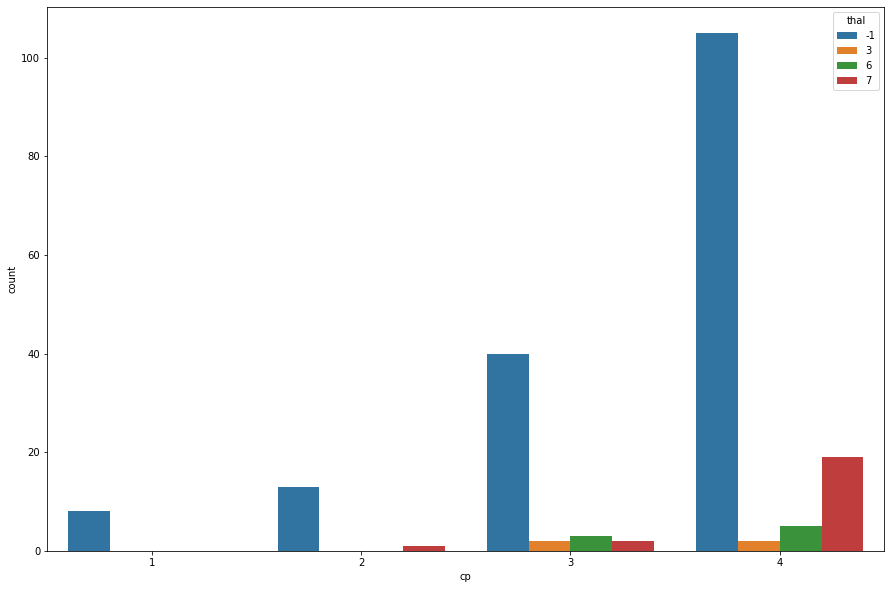

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['cp'],hue=df['thal'])

In [18]:
df_cp_thal = df[['cp','thal']]

df_count_thal_cp = pd.DataFrame()
# df_count_thal_cp.cols = ['cp',-1,7,3,6]
df_count_thal_cp['cp'] = [1,2,3,4]
df_count_thal_cp[-1] = [0]*4
df_count_thal_cp[7] = [0]*4
df_count_thal_cp[3] = [0]*4
df_count_thal_cp[6] = [0]*4

df_count_thal_cp.set_index("cp", inplace = True)

for i in range(1,5):
    t_df = df_cp_thal[df_cp_thal["cp"]==i]
    a = t_df['thal'].value_counts()
    for j in a.index:
        df_count_thal_cp.loc[i,j] = a[j]
df_count_thal_cp['total'] = df_count_thal_cp[-1] + df_count_thal_cp[3] + df_count_thal_cp[7] + df_count_thal_cp[6]

df_count_thal_cp['-1%'] = df_count_thal_cp[-1]*100/df_count_thal_cp['total']
df_count_thal_cp['7%'] = df_count_thal_cp[7]*100/df_count_thal_cp['total']
df_count_thal_cp['3%'] = df_count_thal_cp[3]*100/df_count_thal_cp['total']
df_count_thal_cp['6%'] = df_count_thal_cp[6]*100/df_count_thal_cp['total']

df_count_thal_cp    

,-1,7,3,6,total,-1%,7%,3%,6%
cp,,,,,,,,,
1,8,0,0,0,8,100.000000,0.000000,0.000000,0.000000
2,13,1,0,0,14,92.857143,7.142857,0.000000,0.000000
3,40,2,2,3,47,85.106383,4.255319,4.255319,6.382979
4,105,19,2,5,131,80.152672,14.503817,1.526718,3.816794


#### Too much missing data in each 'cp' category for 'thal' to draw any meaningful insights

##### We don't have relevant information of any type to fill the missing values  in 'thal' column, So it can be dropped

#### Dropping 'ca' and 'thal'

In [19]:
df.drop(['thal','ca'],axis=1,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,age-binned
0,63,1,4,140,260,0,1,112,1,3.0,2,2,3
1,44,1,4,130,209,0,1,127,0,0.0,-1,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,4


##### Assigning mean and mode to missing values in 'chol' and 'fbs' respectively

In [20]:
from scipy.stats import mode
chol = np.array(df['chol'])
mean_chol = int(np.mean(chol[chol!=-1]))

df['fbs'].replace(-1 , mode(df['fbs'])[0][0] , inplace = True)
df['chol'].replace(-1 , mean_chol,inplace = True)

#### 'exang' / 'slope' vs 'Age'

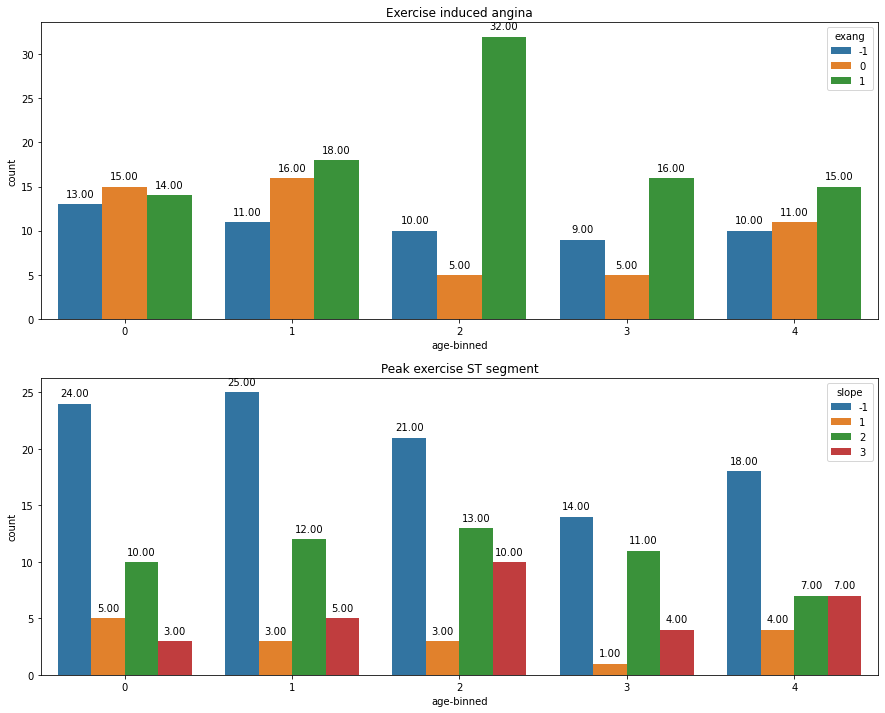

In [21]:
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
splot = sns.countplot(x=df['age-binned'],hue=df['exang'])
splot.set(title='Exercise induced angina')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(2,1,2)
splot = sns.countplot(x=df['age-binned'],hue=df['slope'])
splot.set(title='Peak exercise ST segment')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### 'exang' / 'slope' vs 'cp'

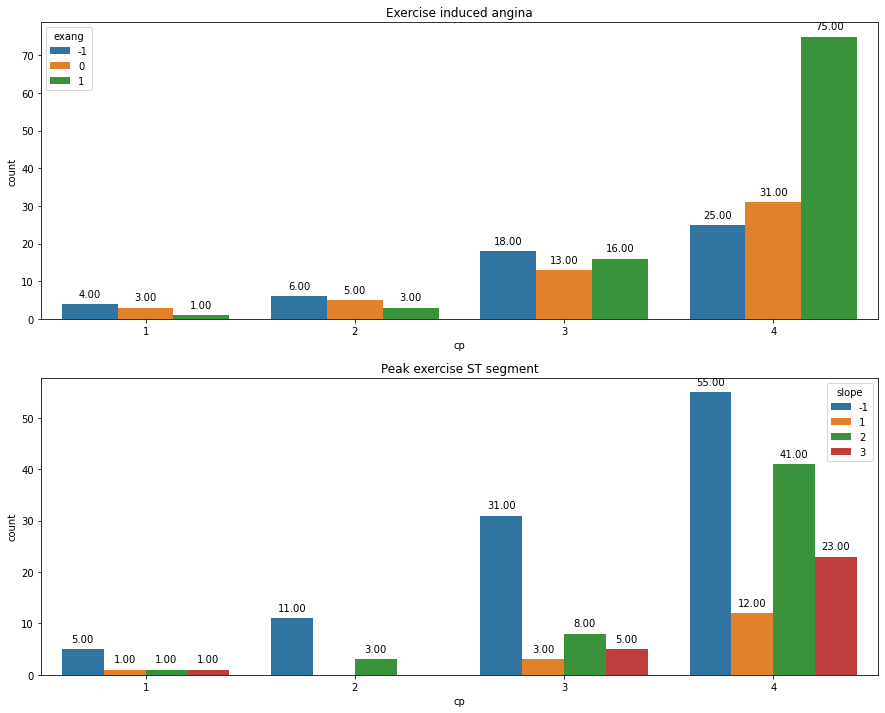

In [22]:
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
splot = sns.countplot(x=df['cp'],hue=df['exang'])
splot.set(title='Exercise induced angina')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(2,1,2)
splot = sns.countplot(x=df['cp'],hue=df['slope'])
splot.set(title='Peak exercise ST segment')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### Both 'exang' and 'slope'  are more evenly distributed when compared wwith 'age'

##### Filling 'exang' and 'slope' using 'age'

In [23]:
df['exang'].value_counts()

 1    95
-1    53
 0    52
Name: exang, dtype: int64

In [24]:
d = {0:1, 1:1, 2:1, 3:1, 4:1} #Assigning mode to each age category
df['exang'] = df.apply( lambda row: d[row['age-binned']] if (row['exang']==-1) else row['exang'],axis=1)

In [25]:
df['exang'].value_counts()

1.0    148
0.0     52
Name: exang, dtype: int64

In [26]:
df['slope'].value_counts()

-1    102
 2     53
 3     29
 1     16
Name: slope, dtype: int64

In [27]:
d = {0:2, 1:2, 2:2, 3:2, 4:3} #Assigning mode to each age category
df['slope'] = df.apply( lambda row: d[row['age-binned']] if (row['slope']==-1) else row['slope'],axis=1)

In [28]:
df['slope'].value_counts()

2.0    137
3.0     47
1.0     16
Name: slope, dtype: int64

In [29]:
df['exang'] = df['exang'].astype("int64")
df['slope'] = df['slope'].astype("int64")

In [30]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,age-binned
0,63,1,4,140,260,0,1,112,1,3.0,2,2,3
1,44,1,4,130,209,0,1,127,0,0.0,2,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0.0,2,1,0
196,62,1,1,-1,139,0,1,-1,1,NaN,2,0,2
197,55,1,4,122,223,1,1,100,0,0.0,2,2,1
198,58,1,4,-1,385,1,2,-1,1,NaN,2,0,1


In [31]:
temp_df = df[['age-binned','thalach', 'oldpeak', 'trestbps']]
temp_df.groupby('age-binned').mean()

,thalach,oldpeak,trestbps
age-binned,,,
0,89.404762,1.089286,88.190476
1,91.866667,1.227273,97.800000
2,95.595745,1.344444,99.340426
3,82.733333,1.547619,95.500000
4,87.055556,1.473077,99.083333


##### The mean value of all the groups more or less remain the same

In [32]:
temp_df1 = df[['cp','thalach', 'oldpeak', 'trestbps']]
temp_df1.groupby('cp').mean()

,thalach,oldpeak,trestbps
cp,,,
1,64.500000,2.333333,65.250000
2,76.785714,0.757143,77.142857
3,77.191489,1.064286,74.595745
4,97.549618,1.397170,107.618321


##### The mean of the columns varies significantly based on 'cp', so we can use them to fill null values

In [33]:
df.replace(-1,np.nan,inplace=True)

In [34]:
df["thalach"] = df.groupby(['cp'])["thalach"].transform(lambda x: x.fillna(int(x.mean())))
df['trestbps'] = df.groupby(['cp'])['trestbps'].transform(lambda x: x.fillna(int(x.mean())))
df['oldpeak'] = df.groupby(['cp'])['oldpeak'].transform(lambda x: x.fillna(x.mean()))

In [35]:
null = pd.DataFrame()
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',  'target']
null['cols'] = cols
null['value'] = 0

null['value'] = null.apply(lambda row : len( df[df[row['cols']]==-1] ),axis=1) 
null.loc[9,['value']] = df['oldpeak'].isnull().sum()
null['percentage missing'] = null['value']*100/200
# null.index
null

,cols,value,percentage missing
0,age,0,0.0
1,sex,0,0.0
2,cp,0,0.0
3,trestbps,0,0.0
4,chol,0,0.0
5,fbs,0,0.0
6,restecg,0,0.0
7,thalach,0,0.0
8,exang,0,0.0
9,oldpeak,0,0.0


##### Converting Target variable into two categories

In [36]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [37]:
df['trestbps'] = df['trestbps'].astype('int64')
df['thalach'] = df['thalach'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         200 non-null    int64   
 1   sex         200 non-null    int64   
 2   cp          200 non-null    int64   
 3   trestbps    200 non-null    int64   
 4   chol        200 non-null    int64   
 5   fbs         200 non-null    int64   
 6   restecg     200 non-null    int64   
 7   thalach     200 non-null    int64   
 8   exang       200 non-null    int64   
 9   oldpeak     200 non-null    float64 
 10  slope       200 non-null    int64   
 11  target      200 non-null    int64   
 12  age-binned  200 non-null    category
dtypes: category(1), float64(1), int64(11)
memory usage: 19.3 KB


### VISUALIZATIONS

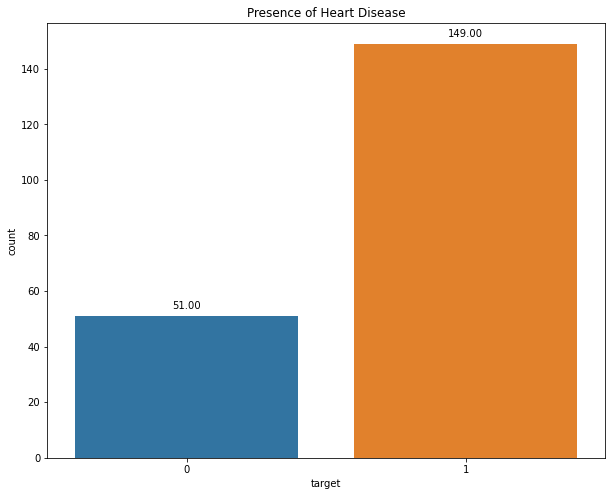

In [38]:
plt.figure(figsize=(10,8))

splot = sns.countplot(x=df['target'])
splot.set(title='Presence of Heart Disease')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

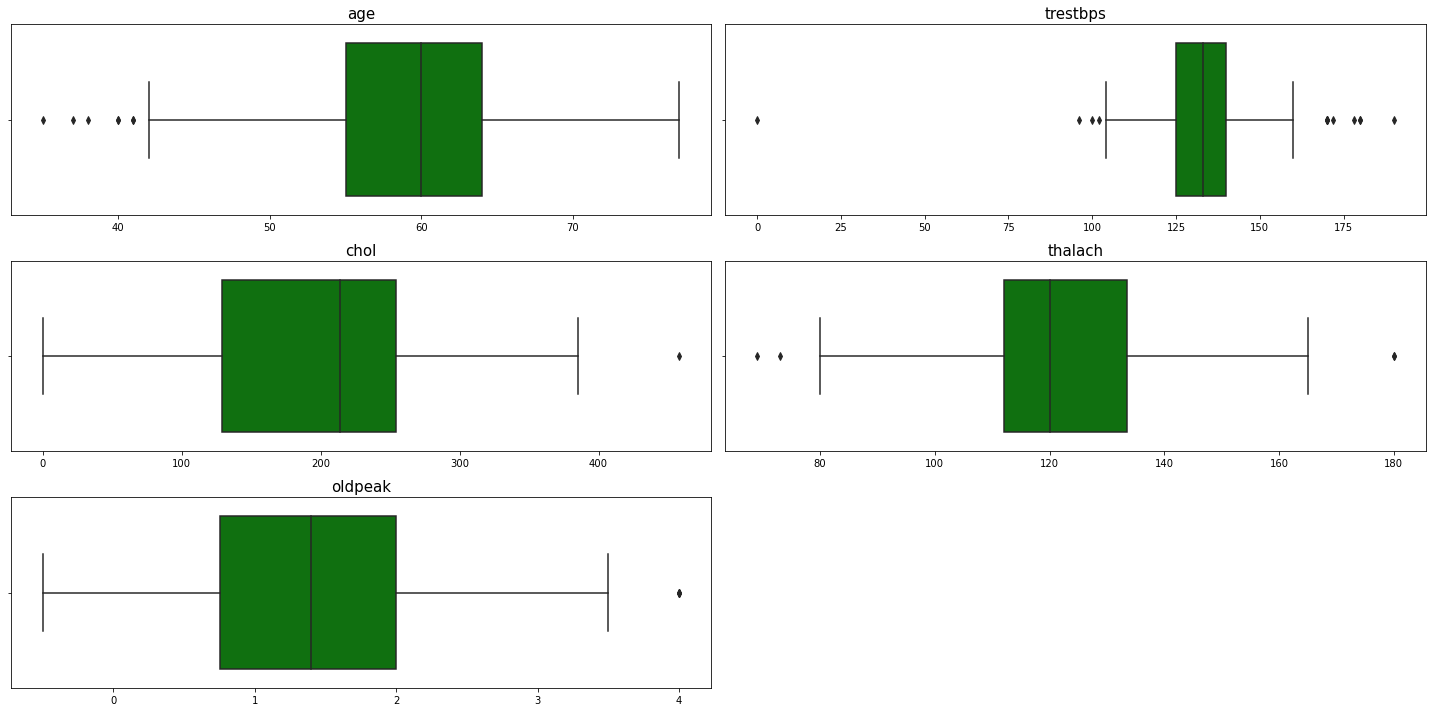

In [39]:
cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(20,10))

for i in range(len(cont)):
    plt.subplot(3,2,i+1)
    ax = sns.boxplot(x=df[cont[i]], orient='h', color='green')
    ax.set_title(cont[i],fontsize=15)
    ax.set_xlabel('')
    plt.tight_layout()

* Outliers present in 'age','trestbps', 'thalach' columns

### REMOVING OUTLIERS

In [40]:
temp_df = df[cont]
threshold = 3

In [41]:
from scipy.stats import zscore
z = np.abs(zscore(temp_df))
np.where(z>threshold)

(array([ 33,  96, 176], dtype=int64), array([1, 0, 1], dtype=int64))

In [42]:
df_new = df[(z<threshold).all(axis=1)]
df_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,age-binned
0,63,1,4,140,260,0,1,112,1,3.000000,2,1,3
1,44,1,4,130,209,0,1,127,0,0.000000,2,0,0
2,60,1,4,132,218,0,1,140,1,1.500000,3,1,2
3,55,1,4,142,228,0,1,149,1,2.500000,1,1,1
4,66,1,3,110,213,1,2,99,1,1.300000,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0.000000,2,1,0
196,62,1,1,131,139,0,1,130,1,2.333333,2,0,2
197,55,1,4,122,223,1,1,100,0,0.000000,2,1,1
198,58,1,4,135,385,1,2,120,1,1.397170,2,0,1


In [43]:
#Percentage of data lost
((len(df)-len(df_new))/len(df))*100

1.5

Percentage of data lost less than 5%. Therefore we can proceed with z-scoere method

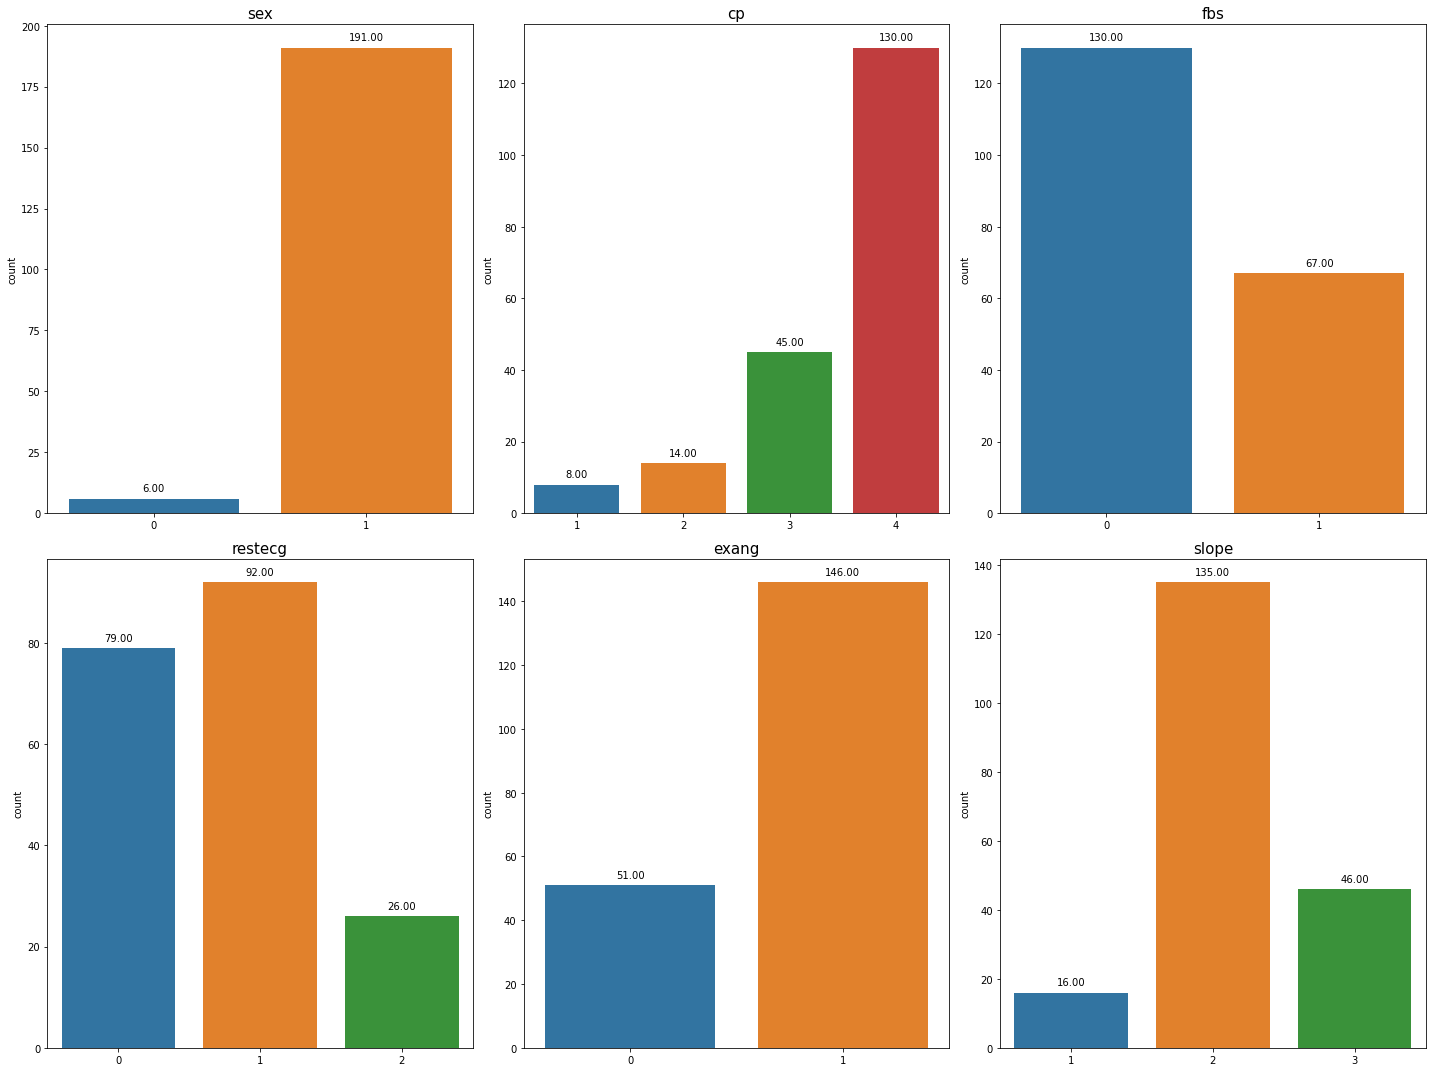

In [44]:
cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
plt.figure(figsize=(20,15))

for i in range(len(cat)):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=df_new[cat[i]])
    ax.set_title(cat[i],fontsize=15)
    ax.set_xlabel('')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.tight_layout()

* The data only contains 6 observations from one sex
* Lot of people have chest pain type - 4
* Lot of people have fbs < the threshold

### BI-VARIATE ANALYSIS

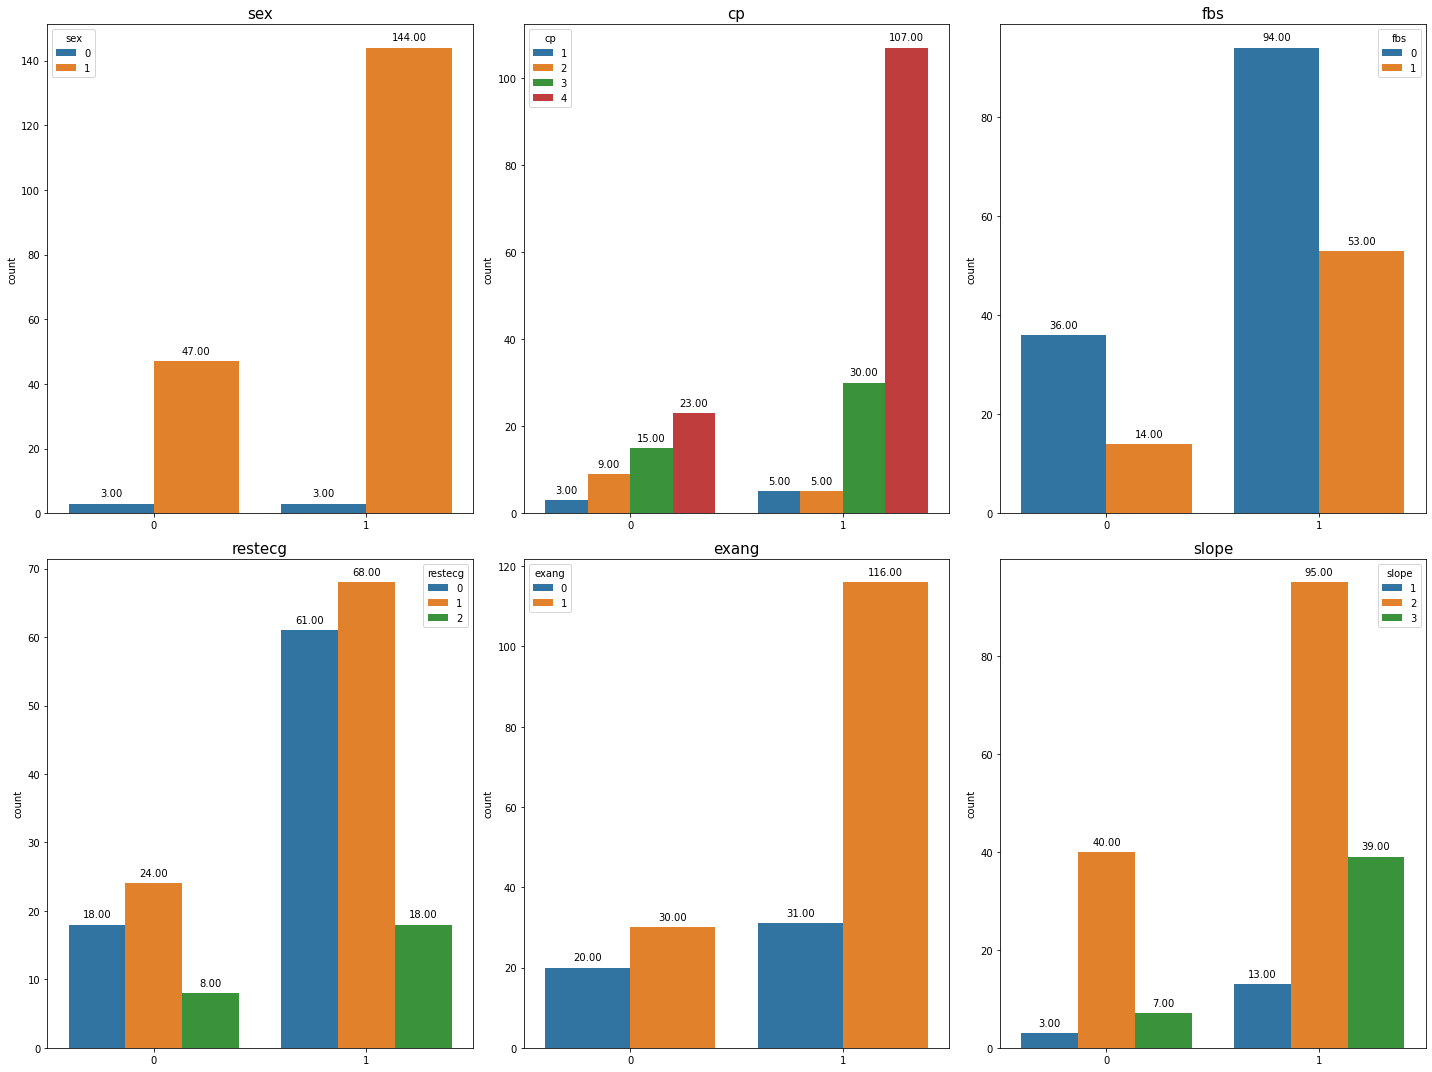

In [45]:
cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
plt.figure(figsize=(20,15))

for i in range(len(cat)):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=df_new['target'],hue=df_new[cat[i]])
    ax.set_title(cat[i],fontsize=15)
    ax.set_xlabel('')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.tight_layout()

### CORRELATION

<AxesSubplot:>

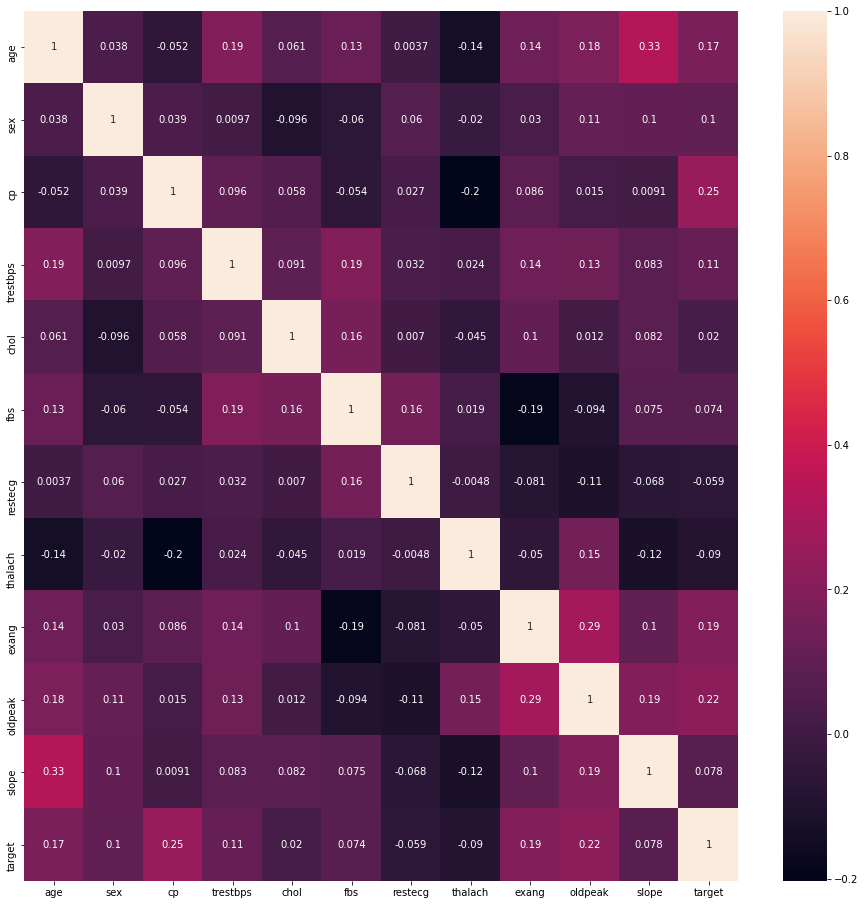

In [46]:
plt.figure(figsize=(16,16))
sns.heatmap(df_new.corr(),annot=True)

* All the columns except 'thalach' and 'cp' are positively correlated with target
* 'chol', 'restecg' and 'sex' have very very weak positive correlation with target

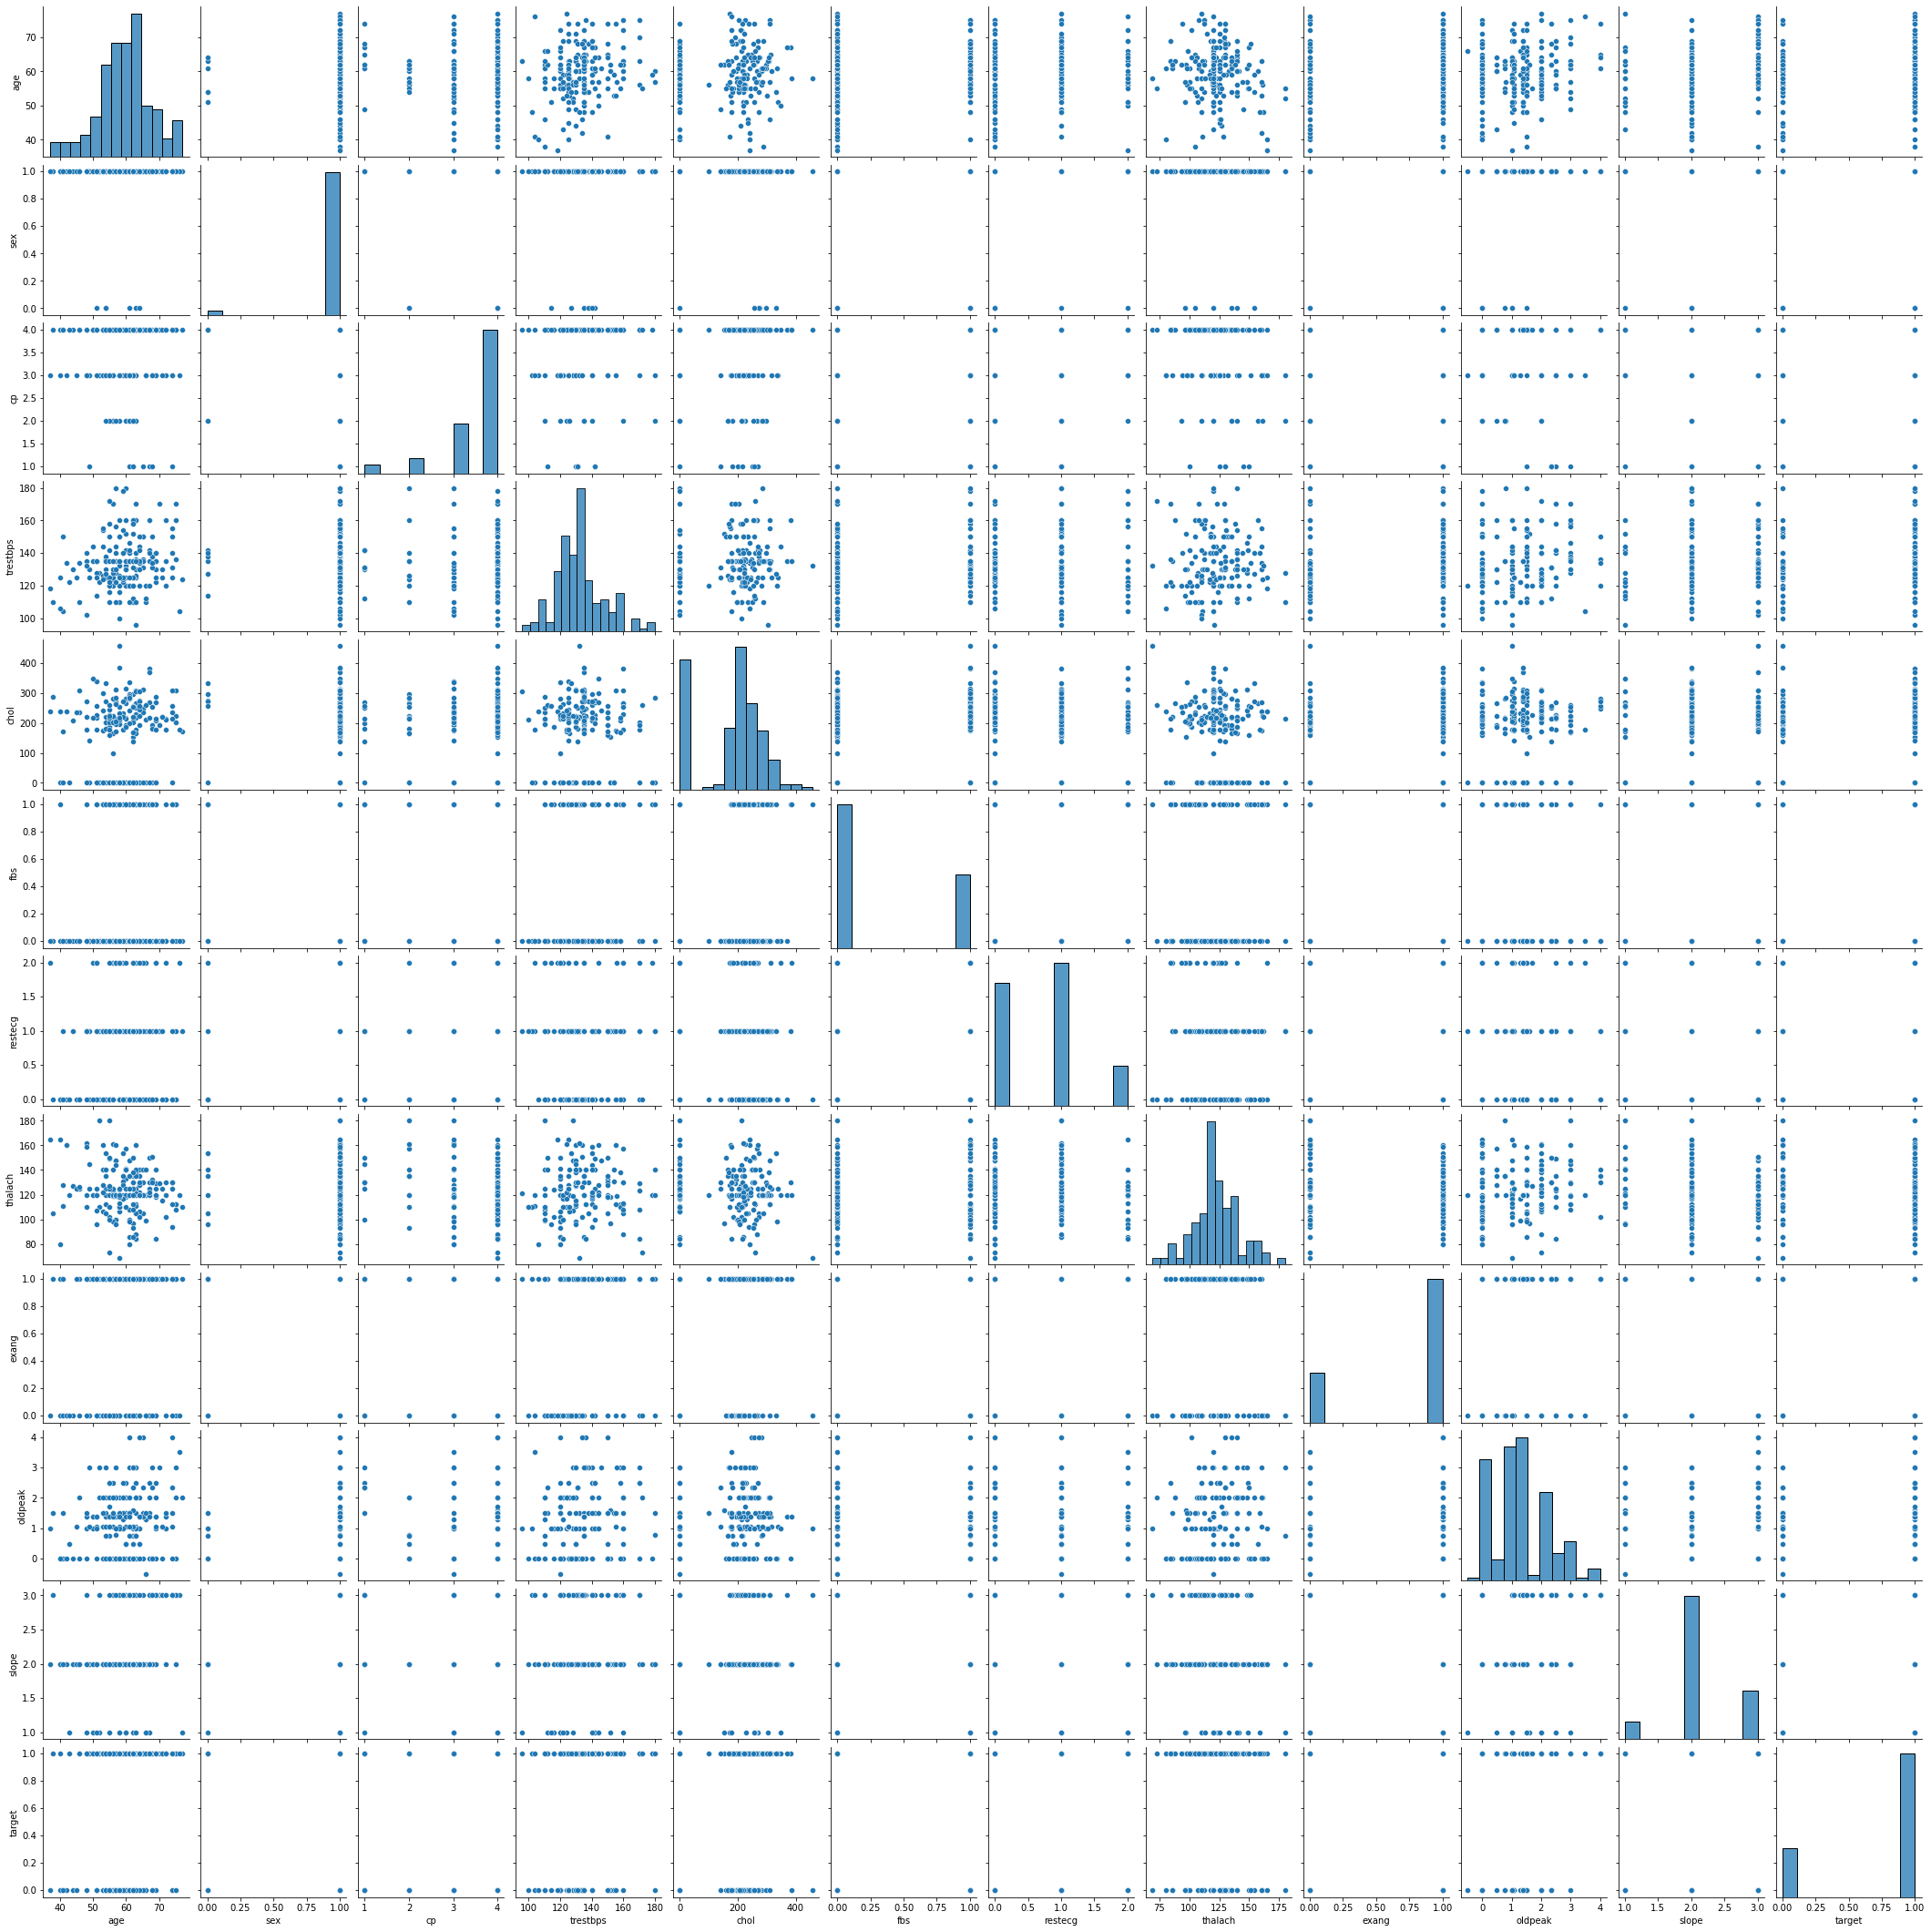

In [47]:
sns.pairplot(df_new)

In [48]:
x = df_new.iloc[:,:-2]
y = df_new.iloc[:,-2]

### REMOVING SKEWNESS

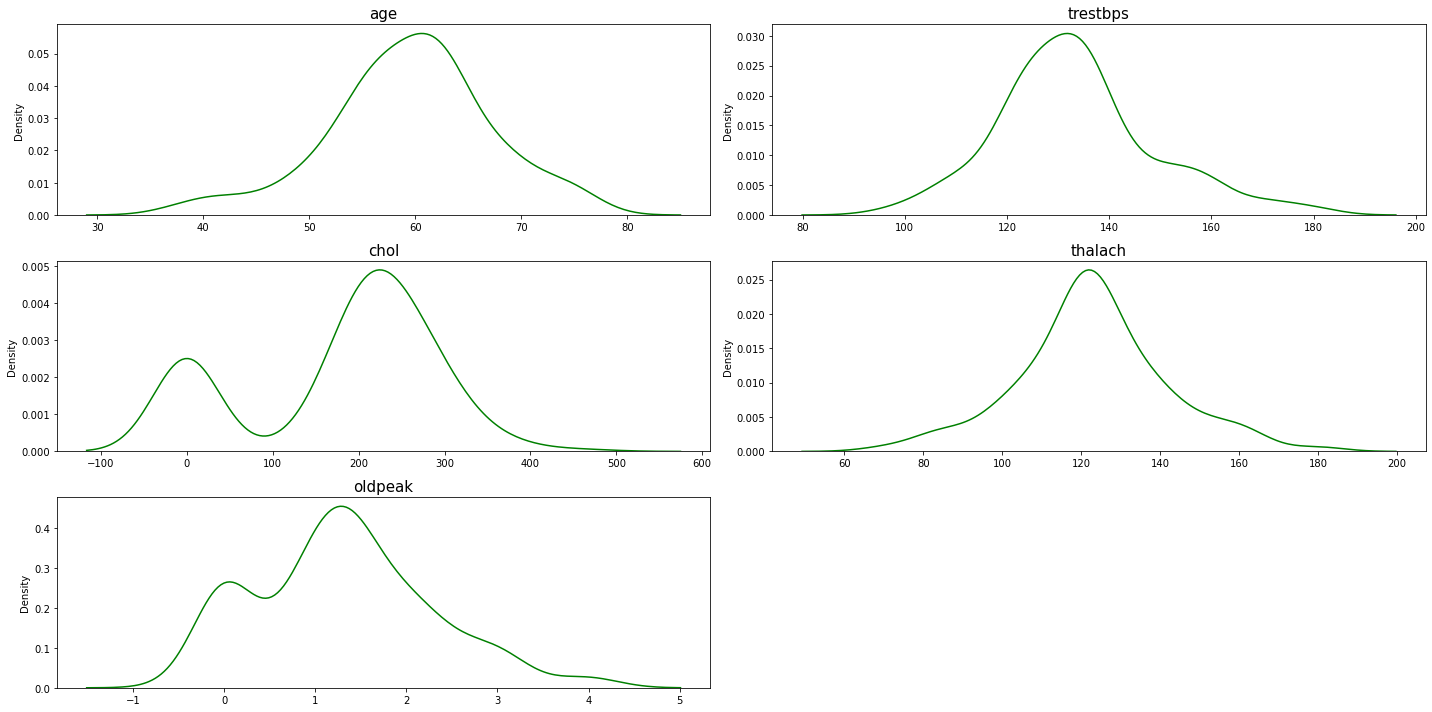

In [49]:
cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(20,10))

for i in range(len(cont)):
    plt.subplot(3,2,i+1)
    ax = sns.distplot(x=df_new[cont[i]], hist=False, color='green')
    ax.set_title(cont[i],fontsize=15)
    ax.set_xlabel('')
    plt.tight_layout()

In [50]:
df_new[cont].skew()

age        -0.322148
trestbps    0.598224
chol       -0.578027
thalach     0.108824
oldpeak     0.450495
dtype: float64

* Slight Skewness in trestbps, chol
* 'chol' and 'oldpeak' are bi-modal

In [51]:
from sklearn.preprocessing import power_transform
x[cont] = power_transform(x[cont],method='yeo-johnson')

### MODEL DEVELOPMENT

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_c = sc.fit_transform(x)
x_c = pd.DataFrame(x_c)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression" : {'model':LogisticRegression(),
                             'params':{'penalty' :['l1', 'l2', 'elasticnet']
                                      },
                            },
    "SVC" : {'model':SVC(),
             'params':{'kernel' :['poly', 'rbf', 'sigmoid'],
                       'gamma':['scale', 'auto']
                      },
            },
    "Decision Tree" : {'model':DecisionTreeClassifier(),
                       'params':{'n_estimators':[50,100,150],
                                 'criterion' :['gini','entropy'],
                                 'max_depth' : [5,8,50,100,150],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestClassifier(),
                       'params':{'n_estimators':[50,100,150],
                                 'max_depth':[5,8,50,100,150], 
                                 'min_samples_leaf':[2,3,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsClassifier(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan','minkowski']
                                      }
                            }
}

In [79]:
max_scr = 0

for r_s in range(1,10000):
    x_train,x_test,y_train,y_test = train_test_split(x_c,y,random_state=r_s,test_size=0.20)
    for i,j in models.items():
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        acc = accuracy_score(y_test,pred_test)
        if acc > max_scr:
            max_scr = acc
            best_model = j['model']
            best_r_s = r_s
print("Model : ",best_model)
print("Score : ",max_scr)
print("Random State : ",r_s)

Model :  SVC()
Score :  0.925
Random State :  9999


### SVC IS THE BEST MODEL WITH ACCURACY SCORE OF 0.925

In [80]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_c,y,random_state=9999,test_size=0.20)
grid = GridSearchCV(models['SVC']['model'], models['SVC']['params'], cv=4, scoring = 'accuracy')
grid.fit(x_train,y_train)
print({
    'model': 'SVC',
    'best_score' : np.sqrt(np.abs(grid.best_score_)),
    'best_params' : grid.best_params_
})

{'model': 'SVC', 'best_score': 0.8632452187485938, 'best_params': {'gamma': 'auto', 'kernel': 'sigmoid'}}


In [81]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
# K_Nearest_Neighbors = KNeighborsClassifier(metric= 'manhattan', n_neighbors=5, weights= 'uniform')
svc = SVC(kernel = 'poly', gamma = 'auto')
clf = svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_test))
print("Classification Report : ")
print(classification_report(y_test,pred_test))

Accuracy Score :  0.775
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      0.94      0.87        33

    accuracy                           0.78        40
   macro avg       0.41      0.47      0.44        40
weighted avg       0.67      0.78      0.72        40



In [82]:
cf_matrix = confusion_matrix(y_pred, y_test)
cf_matrix

array([[ 2,  4],
       [ 5, 29]], dtype=int64)

<AxesSubplot:>

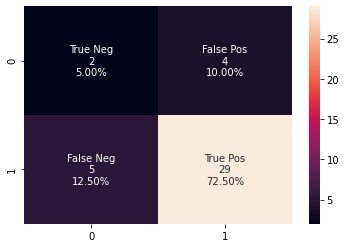

In [83]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

In [84]:
import joblib
joblib.dump(svc,"svc_heart_disease.pkl")

['svc_heart_disease.pkl']